# Модуль 4. Бібліотека dplyr

Якщо бібліотеку не встановлено, то її можна посставити наступним чином:

```
install.packages("назва бібліотеки")
```

Але в колабі більшість потрібних уже стоять, тому в цьому нема необхідності. 
Запустимо бібліотеку dplyr - головний інструмент маніпуляції даними в R.

In [1]:
library(dplyr) #install.packages("dplyr")
#require(dplyr)

#dplyr::select()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Зчитування даних

In [2]:
corona <- read.csv("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv")

In [3]:
head(corona)

,ID,age,sex,city,province,country,wuhan.0._not_wuhan.1.,latitude,longitude,geo_resolution,⋯,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.64696,117.7166,admin3,⋯,,,,,Chaohu City,Hefei City,Anhui,China,340181,
2,2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.77863,117.3319,admin3,⋯,,,,,Baohe District,Hefei City,Anhui,China,340111,
3,3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,⋯,,,,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,
4,4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,⋯,,,,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,
5,5,50,female,"Feidong County, Hefei City",Anhui,China,1,32.00123,117.5681,admin3,⋯,,,,,Feidong County,Hefei City,Anhui,China,340122,
6,6,N/A,N/A,Lu'an City,Anhui,China,1,31.75941,116.3151,admin2,⋯,,,,,,Lu'an City,Anhui,China,341500,


In [4]:
corona <- readr::read_csv("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  ID = col_double(),
  `wuhan(0)_not_wuhan(1)` = col_double(),
  latitude = col_double(),
  longitude = col_double(),
  data_moderator_initials = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“23 parsing failures.
 row                     col           expected actual                                                                                          file
5835 data_moderator_initials 1/0/T/F/TRUE/FALSE     SL 'https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv'
5836 data_moderator_initials 1/0/T/F/TRUE/FALSE     SL 'https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv'
5837 data_moderator_initials 1/0/T/F/TRUE/FALSE     SL 'https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv'
5838 data_moderator_initials 1/0/T/F/TRUE/FALSE     SL 'https://raw.githubusercontent

In [6]:
#corona <- data.table::fread("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv")

## Описові функції

In [7]:
bind_rows(
  head(corona, 2), tail(corona, 2)
  )

ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,⋯,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.64696,117.7166,admin3,⋯,NA,NA,NA,NA,Chaohu City,Hefei City,Anhui,China,340181,NA
2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.77863,117.3319,admin3,⋯,NA,NA,NA,NA,Baohe District,Hefei City,Anhui,China,340111,NA
14936,NA,NA,NA,Telangana,India,1,17.36600,78.4750,admin,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
14937,NA,NA,NA,Telangana,India,1,17.36600,78.4750,admin,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
glimpse(corona)

Rows: 14,602
Columns: 33
$ ID                       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…
$ age                      <chr> "30", "47", "49", "47", "50", "N/A", "42", N…
$ sex                      <chr> "male", "male", "male", "female", "female", …
$ city                     <chr> "Chaohu City, Hefei City", "Baohe District, …
$ province                 <chr> "Anhui", "Anhui", "Anhui", "Anhui", "Anhui",…
$ country                  <chr> "China", "China", "China", "China", "China",…
$ `wuhan(0)_not_wuhan(1)`  <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ latitude                 <dbl> 31.64696, 31.77863, 31.82831, 31.82831, 32.0…
$ longitude                <dbl> 117.7166, 117.3319, 117.2248, 117.2248, 117.…
$ geo_resolution           <chr> "admin3", "admin3", "point", "point", "admin…
$ date_onset_symptoms      <chr> "18.01.2020", "10.01.2020", "15.01.2020", "1…
$ date_admission_hospital  <chr> "20.01.2020", "21.01.2020", "20.01.2020", "2…
$ date_confirmation        

In [10]:
rowMeans(is.na(corona))

[1] 0.3333333 0.3333333 0.3030303 0.3333333 0.3030303 0.4848485 0.3030303
    [8] 0.4242424 0.3030303 0.3333333 0.4848485 0.3636364 0.5151515 0.3030303
   [15] 0.3030303 0.4848485 0.4848485 0.3333333 0.2727273 0.4848485 0.3030303
   [22] 0.3030303 0.3030303 0.3333333 0.3333333 0.3030303 0.3030303 0.2727273
   [29] 0.4545455 0.6060606 0.5757576 0.6060606 0.6060606 0.6060606 0.6060606
   [36] 0.6060606 0.6060606 0.4848485 0.4848485 0.4848485 0.4848485 0.6060606
   [43] 0.6060606 0.6060606 0.6060606 0.6060606 0.6060606 0.6060606 0.6060606
   [50] 0.6060606 0.6060606 0.5757576 0.5454545 0.5454545 0.5454545 0.2424242
   [57] 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485
   [64] 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485 0.5151515
   [71] 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485 0.4848485
   [78] 0.4848485 0.4545455 0.4545455 0.2424242 0.5151515 0.2424242 0.5151515
   [85] 0.5151515 0.5151515 0.5151515 0.5151515 0.3333333 0.3030303 0.3939394
   [92] 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545
   [99] 0.2727273 0.2727273 0.2727273 0.3030303 0.3636364 0.2727273 0.5151515
  [106] 0.5151515 0.5151515 0.5151515 0.5151515 0.5151515 0.5151515 0.5151515
  [113] 0.5151515 0.5151515 0.5151515 0.5151515 0.5151515 0.5151515 0.3636364
  [120] 0.3636364 0.4242424 0.3030303 0.5454545 0.5454545 0.5454545 0.5454545
  [127] 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545
  [134] 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545 0.5454545
  [141] 0.5454545 0.5454545 0.5454545 0.3333333 0.3636364 0.3333333 0.3636364
  [148] 0.3636364 0.5757576 0.3030303 0.3030303 0.3030303 0.3030303 0.3030303
  [155] 0.3030303 0.3030303 0.5757576 0.5757576 0.3636364 0.3030303 0.3030303
  [162] 0.2424242 0.3333333 0.3030303 0.3333333 0.4242424 0.3333333 0.5757576
  [169] 0.5757576 0.5757576 0.3333333 0.3939394 0.3333333 0.3333333 0.5757576
  [176] 0.5151515 0.3939394 0.3939394 0.3636364 0.3636364 0.3636364 0.4545455
  [183] 0.3636364 0.4848485 0.3939394 0.3030303 0.3030303 0.3333333 0.4545455
  [190] 0.4545455 0.3939394 0.3939394 0.3939394 0.4242424 0.5757576 0.5757576
  [197] 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576
  [204] 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576
  [211] 0.5757576 0.5757576 0.5757576 0.5757576 0.3636364 0.3333333 0.5757576
  [218] 0.5757576 0.5757576 0.5757576 0.6060606 0.6060606 0.6060606 0.6060606
  [225] 0.3333333 0.2727273 0.6060606 0.5757576 0.5757576 0.5757576 0.5757576
  [232] 0.5151515 0.5151515 0.5151515 0.3030303 0.3333333 0.5757576 0.5757576
  [239] 0.5757576 0.5757576 0.5757576 0.5757576 0.4242424 0.5757576 0.5757576
  [246] 0.3333333 0.3333333 0.3333333 0.3333333 0.4242424 0.3636364 0.4242424
  [253] 0.3333333 0.3636364 0.3030303 0.3636364 0.3939394 0.3333333 0.2727273
  [260] 0.3030303 0.3030303 0.6060606 0.6060606 0.6060606 0.5757576 0.5757576
  [267] 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576
  [274] 0.3939394 0.3939394 0.6060606 0.6060606 0.6060606 0.6060606 0.6363636
  [281] 0.6363636 0.6363636 0.6363636 0.6363636 0.6363636 0.6060606 0.6969697
  [288] 0.6969697 0.6969697 0.6969697 0.6969697 0.6969697 0.6969697 0.3636364
  [295] 0.3636364 0.3939394 0.3333333 0.3333333 0.3333333 0.6363636 0.3333333
  [302] 0.3333333 0.3939394 0.3939394 0.6363636 0.6363636 0.3636364 0.5757576
  [309] 0.5757576 0.3333333 0.3030303 0.3333333 0.3333333 0.3030303 0.4242424
  [316] 0.4242424 0.6060606 0.6060606 0.6060606 0.6060606 0.6060606 0.6060606
  [323] 0.6060606 0.6060606 0.5757576 0.5757576 0.5757576 0.6060606 0.6060606
  [330] 0.6060606 0.5757576 0.6060606 0.6060606 0.6060606 0.6060606 0.6060606
  [337] 0.3333333 0.3030303 0.5757576 0.5757576 0.6060606 0.6060606 0.5757576
  [344] 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576
  [351] 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576 0.5757576
  [358] 0.5757576 0.575757

In [11]:
colMeans(is.na(corona))

ID                      age                      sex 
            0.0000000000             0.8870702643             0.8923435146 
                    city                 province                  country 
            0.2796192302             0.0275304753             0.0017805780 
   wuhan(0)_not_wuhan(1)                 latitude                longitude 
            0.0000000000             0.0002054513             0.0002054513 
          geo_resolution      date_onset_symptoms  date_admission_hospital 
            0.0000000000             0.9481577866             0.9487056568 
       date_confirmation                 symptoms           lives_in_Wuhan 
            0.0068483769             0.9645938912             0.9606903164 
    travel_history_dates  travel_history_location reported_market_exposure 
            0.9620599918             0.9391864128             0.9947267498 
  additional_information   chronic_disease_binary          chronic_disease 
            0.8248185180             0.9976030681             0.9986303246 
                  source       sequence_available                  outcome 
            0.0152033968             0.9998630325             0.9869880838 
 date_death_or_discharge     notes_for_discussion                 location 
            0.9933570744             0.9871935351             0.9234351459 
                  admin3                   admin2                   admin1 
            0.9193946035             0.3676893576             0.0308861800 
             country_new                 admin_id  data_moderator_initials 
            0.0137652376             0.0119846596             1.0000000000

In [16]:
frac_na <- function(variable) {
  a = is.na(variable)
  mean(a)
}

#frac_na(corona[["age"]])

#f3(f2(f1(object)))

#object %>% f1() %>% f2() %>% f3()

summarise_all(corona, frac_na) %>% t() %>% as_tibble(rownames = "variable") %>% arrange(desc(V1))

#arrange(as_tibble(t(summarise_all(corona, frac_na)), rownames = "variable"), desc(V1))

variable,V1
<chr>,<dbl>
data_moderator_initials,1.0000000000
sequence_available,0.9998630325
chronic_disease,0.9986303246
chronic_disease_binary,0.9976030681
reported_market_exposure,0.9947267498
date_death_or_discharge,0.9933570744
notes_for_discussion,0.9871935351
outcome,0.9869880838
symptoms,0.9645938912


In [19]:
strsplit(corona[['age']], "-") %>% lapply(as.numeric) %>% sapply(mean)

Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
Warnin

[1] 30.00000 47.00000 49.00000 47.00000 50.00000       NA 42.00000       NA
    [9] 59.00000 30.00000       NA 39.00000       NA 38.00000 45.00000       NA
   [17]       NA 33.00000       NA       NA 37.00000 39.00000 32.00000 45.00000
   [25] 45.00000 18.00000 56.00000 42.00000 33.00000       NA       NA       NA
   [33]       NA       NA       NA       NA       NA 44.00000 65.00000 21.00000
   [41] 41.00000       NA       NA       NA       NA       NA       NA       NA
   [49]       NA       NA       NA       NA       NA       NA       NA 44.00000
   [57]       NA       NA       NA       NA       NA       NA       NA       NA
   [65]       NA       NA       NA       NA       NA       NA       NA       NA
   [73]       NA       NA       NA       NA       NA       NA 30.00000 70.00000
   [81] 43.00000       NA 31.00000       NA       NA       NA       NA       NA
   [89] 43.00000 24.00000 40.00000       NA       NA       NA       NA       NA
   [97]       NA       NA 66.00000 65.00000 36.00000 10.00000 63.00000 37.00000
  [105]       NA       NA       NA       NA       NA       NA       NA       NA
  [113]       NA       NA       NA       NA       NA       NA 78.00000 76.00000
  [121] 48.00000 66.00000       NA       NA       NA       NA       NA       NA
  [129]       NA       NA       NA       NA       NA       NA       NA       NA
  [137]       NA       NA       NA       NA       NA       NA       NA 66.00000
  [145] 63.00000 62.00000 49.00000 46.00000       NA 34.00000 41.00000 72.00000
  [153] 20.00000 54.00000 33.00000 49.00000       NA       NA 42.00000 33.00000
  [161]  2.00000 29.00000 62.00000 61.00000 20.00000 51.00000 50.00000       NA
  [169]       NA       NA 72.00000 80.00000 49.00000 69.00000       NA       NA
  [177] 66.00000 32.00000 28.00000 55.00000 68.00000 30.00000 34.00000 30.00000
  [185] 50.00000 39.00000 56.00000 62.00000 63.00000 62.00000 57.00000 35.00000
  [193] 40.00000 30.00000       NA       NA       NA       NA       NA       NA
  [201]       NA       NA       NA       NA       NA       NA       NA       NA
  [209]       NA       NA       NA       NA       NA       NA 30.00000 37.00000
  [217]       NA       NA       NA       NA       NA       NA       NA       NA
  [225] 56.00000 50.00000       NA       NA       NA       NA       NA 35.00000
  [233] 36.00000 35.00000 27.00000 40.00000       NA       NA       NA       NA
  [241]       NA       NA 42.00000       NA       NA 33.00000 40.00000 50.00000
  [249] 42.00000 66.00000 52.00000 29.00000 28.00000 22.00000 32.00000 42.00000
  [257] 23.00000 49.00000 38.00000 62.00000 65.00000       NA       NA       NA
  [265]       NA       NA       NA       NA       NA       NA       NA       NA
  [273]       NA 56.00000 35.00000       NA       NA       NA       NA       NA
  [281]       NA       NA       NA       NA       NA 88.00000       NA       NA
  [289]       NA       NA       NA       NA       NA       NA 28.00000 31.00000
  [297] 50.00000 48.00000 36.00000       NA 37.00000 19.00000 60.00000 58.00000
  [305]       NA       NA 29.00000       NA       NA 47.00000 52.00000 51.00000
  [313] 53.00000 39.00000 34.00000 49.00000       NA       NA       NA       NA
  [321]       NA       NA       NA       NA       NA       NA       NA       NA
  [329]       NA       NA       NA       NA       NA       NA       NA       NA
  [337] 46.00000 46.00000       NA       NA       NA       NA       NA       NA
  [345]       NA       NA       NA       NA       NA       NA       NA       NA
  [353]       NA       NA       NA       NA       NA       NA       NA       NA
  [361]       NA       NA       NA       NA       NA       NA       NA       NA
  [369]       NA       NA       NA       NA       NA       NA       NA       NA
  [377]       NA       NA       NA       NA       NA       NA       NA       NA
  [385]       NA       NA       NA       NA       NA       NA       NA       NA
  [393]       NA       NA       NA       NA       NA       NA       NA       NA
  [4

In [20]:
mean_age <- function(age) {
  strsplit(age, "-") %>% lapply(as.numeric) %>% sapply(mean)
}

In [25]:
corona %>% 
  select(age, sex, latitude, longitude) %>%
  filter(sex == "male" & longitude > 100) %>%
  mutate(lat_lon = longitude - latitude,
         age = mean_age(age)) %>%
  group_by(age) %>%
  summarise(lat_lon_mean = mean(lat_lon), n = n()) %>%
  arrange(desc(age)) %>%
  top_n(10, n) %>%
  slice(1:5) %>%
  rename(new_column_name = lat_lon_mean) %>%
  readr::write_csv("result.csv")
#sellect(corona, )

Warning message in lapply(., as.numeric):
“NAs introduced by coercion”
`summarise()` ungrouping output (override with `.groups` argument)



In [ ]:
sapply(corona, function(x) sum(is.na(x))) #vector
lapply(corona, function(x) sum(is.na(x))) #list
apply(corona, 2, function(x) sum(is.na(x))) #matrix

ID                      age                      sex 
                       0                    12953                    13030 
                    city                 province                  country 
                    4083                      402                       26 
   wuhan(0)_not_wuhan(1)                 latitude                longitude 
                       0                        3                        3 
          geo_resolution      date_onset_symptoms  date_admission_hospital 
                       0                    13845                    13853 
       date_confirmation                 symptoms           lives_in_Wuhan 
                     100                    14085                    14028 
    travel_history_dates  travel_history_location reported_market_exposure 
                   14048                    13714                    14525 
  additional_information   chronic_disease_binary          chronic_disease 
                   12044                    14567                    14582 
                  source       sequence_available                  outcome 
                     222                    14600                    14412 
 date_death_or_discharge     notes_for_discussion                 location 
                   14505                    14415                    13484 
                  admin3                   admin2                   admin1 
                   13425                     5369                      451 
             country_new                 admin_id  data_moderator_initials 
                     201                      175                    14602

In [ ]:
as.data.frame(apply(corona, 2, function(x) sum(is.na(x))))

,"apply(corona, 2, function(x) sum(is.na(x)))"
,<int>
ID,0
age,12953
sex,13030
city,4083
province,402
country,26
wuhan(0)_not_wuhan(1),0
latitude,3
longitude,3


In [ ]:
summary(corona)

       ID            age                sex                city          
 Min.   :    1   Length:14602       Length:14602       Length:14602      
 1st Qu.: 3708   Class :character   Class :character   Class :character  
 Median : 7578   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 7500                                                           
 3rd Qu.:11251                                                           
 Max.   :14937                                                           
                                                                         
   province           country          wuhan(0)_not_wuhan(1)    latitude     
 Length:14602       Length:14602       Min.   :1             Min.   :-42.00  
 Class :character   Class :character   1st Qu.:1             1st Qu.: 27.91  
 Mode  :character   Mode  :character   Median :1             Median : 32.57  
                                       Mean   :1             Mean   : 32.40  
                  

## Створенння нових змінних

In [ ]:
corona$sex

[1] "male"   "male"   "male"   "female" "female" "N/A"    "female" "female"
    [9] "female" "male"   "N/A"    "male"   "N/A"    "female" "male"   "N/A"   
   [17] "N/A"    "female" "female" "N/A"    "male"   "male"   "female" "male"  
   [25] "male"   "female" "female" "male"   "female" NA       NA       NA      
   [33] NA       NA       NA       NA       NA       "male"   "male"   "male"  
   [41] "male"   NA       NA       NA       NA       NA       NA       NA      
   [49] NA       NA       NA       NA       NA       NA       NA       "female"
   [57] "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "N/A"   
   [65] "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "N/A"   
   [73] "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "N/A"    "female" "male"  
   [81] "female" "N/A"    "male"   NA       NA       NA       NA       NA      
   [89] "male"   "male"   "male"   NA       NA       NA       NA       NA      
   [97] NA       NA       "male"   "female" "male"   "male"   "female" "female"
  [105] NA       NA       NA       NA       NA       NA       NA       NA      
  [113] NA       NA       NA       NA       NA       NA       "male"   "female"
  [121] "female" "female" NA       NA       NA       NA       NA       NA      
  [129] NA       NA       NA       NA       NA       NA       NA       NA      
  [137] NA       NA       NA       NA       NA       NA       NA       "female"
  [145] "male"   "female" "male"   "male"   NA       "male"   "male"   "female"
  [153] "female" "male"   "female" "female" NA       NA       "male"   "male"  
  [161] "female" "male"   "male"   "male"   "male"   "male"   "female" NA      
  [169] NA       NA       "male"   "male"   "male"   "male"   NA       NA      
  [177] "male"   "female" "male"   "male"   "male"   "female" "female" "female"
  [185] "male"   "male"   "male"   "female" "male"   "female" "female" "female"
  [193] "female" "male"   NA       NA       NA       NA       NA       NA      
  [201] NA       NA       NA       NA       NA       NA       NA       NA      
  [209] NA       NA       NA       NA       NA       NA       "male"   "male"  
  [217] NA       NA       NA       NA       NA       NA       NA       NA      
  [225] "male"   "male"   NA       NA       NA       NA       NA       "male"  
  [233] "female" "female" "male"   "female" NA       NA       NA       NA      
  [241] NA       NA       "female" NA       NA       "male"   "male"   "female"
  [249] "male"   "male"   "female" "male"   "male"   "male"   "female" "male"  
  [257] "male"   "male"   "male"   "female" "male"   NA       NA       NA      
  [265] NA       NA       NA       NA       NA       NA       NA       NA      
  [273] NA       "female" "male"   NA       NA       NA       NA       "male"  
  [281] "male"   "male"   "female" "female" "female" "male"   NA       NA      
  [289] NA       NA       NA       NA       NA       "male"   "female" "male"  
  [297] "male"   "male"   "male"   NA       "male"   "male"   "female" "male"  
  [305] NA       NA       "female" NA       NA       "male"   "male"   "male"  
  [313] "male"   "female" "female" "male"   NA       NA       NA       NA      
  [321] NA       NA       NA       NA       NA       NA       NA       NA      
  [329] NA       NA       NA       NA       NA       NA       NA       NA      
  [337] "male"   "male"   NA       NA       NA       NA       NA       NA      
  [345] NA       NA       NA       NA       NA       NA       NA       NA      
  [353] NA       NA       NA       NA       NA       NA       NA       NA      
  [361] NA       NA       NA       NA       NA       NA       NA       NA      
  [369] NA       NA       NA       NA       NA       NA       NA       NA      
  [377] NA       NA       NA       NA       NA       NA       NA       NA      
  [385] NA       NA       NA       NA       NA       NA       NA       NA      
  [393] NA       NA       NA       NA       NA       NA       NA       NA      
  [4

In [ ]:
corona$sex = as.numeric(corona$sex == "male")

#corona %>% mutate(sex = as.numeric(sex == "male"))

In [ ]:
?lubridate::wday

In [ ]:
as.Date(18334, origin = "1970-01-01")

[1] "2020-03-13"

In [ ]:
lubridate::as_date(18334)

[1] "2020-03-13"

In [ ]:
lubridate::ymd("2020-03-13") %>% as.numeric()
lubridate::dmy_hm("13/3/2020 12:59")
lubridate::dmy_hms("13/3/2020 12:45:11") %>% lubridate::day()
lubridate::mdy("03.13.2020") %>% lubridate::leap_year()
lubridate::dmy("13 Mar 2020") %>% lubridate::week()
lubridate::dmy("13 mar 20") %>% lubridate::wday(week_start = getOption("lubridate.week.start", 1))

[1] 18334

[1] "2020-03-13 12:59:00 UTC"

[1] 13

[1] TRUE

[1] 11

[1] 5

In [ ]:
lubridate::dmy(corona$date_onset_symptoms) - lubridate::dmy(corona$date_confirmation)

Warning message:
“ 11 failed to parse.”
Warning message:
“ 5 failed to parse.”


Time differences in days
    [1]  -4 -13  -8  -6 -13  NA  -1  NA  -7  -6  NA  NA  NA  -1  -6  NA  NA  NA
   [19] -13  NA  -7 -12  -4  -3  -4  -2  -5  -2  NA  NA  NA  NA  NA  NA  NA  NA
   [37]  NA  -5  -1  -4  -3  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [55]  NA  -6  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
   [73]  NA  NA  NA  NA  NA  NA  NA  NA  -2  NA  NA  NA  NA  NA  NA  NA  -5  -7
   [91] -12  NA  NA  NA  NA  NA  NA  NA -15 -18 -20  NA -13 -19  NA  NA  NA  NA
  [109]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  -5  -3  -3  -8  NA  NA  NA  NA
  [127]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  -6
  [145]  -8 -13  -1  -2  NA  -5  -4  -5  -2  -2  -5  -3  NA  NA  NA  -5  -2  -1
  [163]  -9  -3  -4  -8  -8  NA  NA  NA  -4  NA  -1  NA  NA  NA -23  NA  NA -11
  [181]  NA  NA  NA  NA  NA  -1  -4  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [199]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA -12
  [217]  NA  NA

In [ ]:
dim(corona)
nrow(corona)
ncol(corona)
names(corona) 
colnames(corona)
rownames(corona)

[1] 14602    33

[1] 14602

[1] 33

[1] "ID"                       "age"                     
 [3] "sex"                      "city"                    
 [5] "province"                 "country"                 
 [7] "wuhan(0)_not_wuhan(1)"    "latitude"                
 [9] "longitude"                "geo_resolution"          
[11] "date_onset_symptoms"      "date_admission_hospital" 
[13] "date_confirmation"        "symptoms"                
[15] "lives_in_Wuhan"           "travel_history_dates"    
[17] "travel_history_location"  "reported_market_exposure"
[19] "additional_information"   "chronic_disease_binary"  
[21] "chronic_disease"          "source"                  
[23] "sequence_available"       "outcome"                 
[25] "date_death_or_discharge"  "notes_for_discussion"    
[27] "location"                 "admin3"                  
[29] "admin2"                   "admin1"                  
[31] "country_new"              "admin_id"                
[33] "data_moderator_initials"

[1] "ID"                       "age"                     
 [3] "sex"                      "city"                    
 [5] "province"                 "country"                 
 [7] "wuhan(0)_not_wuhan(1)"    "latitude"                
 [9] "longitude"                "geo_resolution"          
[11] "date_onset_symptoms"      "date_admission_hospital" 
[13] "date_confirmation"        "symptoms"                
[15] "lives_in_Wuhan"           "travel_history_dates"    
[17] "travel_history_location"  "reported_market_exposure"
[19] "additional_information"   "chronic_disease_binary"  
[21] "chronic_disease"          "source"                  
[23] "sequence_available"       "outcome"                 
[25] "date_death_or_discharge"  "notes_for_discussion"    
[27] "location"                 "admin3"                  
[29] "admin2"                   "admin1"                  
[31] "country_new"              "admin_id"                
[33] "data_moderator_initials"

[1] "1"     "2"     "3"     "4"     "5"     "6"     "7"     "8"     "9"    
   [10] "10"    "11"    "12"    "13"    "14"    "15"    "16"    "17"    "18"   
   [19] "19"    "20"    "21"    "22"    "23"    "24"    "25"    "26"    "27"   
   [28] "28"    "29"    "30"    "31"    "32"    "33"    "34"    "35"    "36"   
   [37] "37"    "38"    "39"    "40"    "41"    "42"    "43"    "44"    "45"   
   [46] "46"    "47"    "48"    "49"    "50"    "51"    "52"    "53"    "54"   
   [55] "55"    "56"    "57"    "58"    "59"    "60"    "61"    "62"    "63"   
   [64] "64"    "65"    "66"    "67"    "68"    "69"    "70"    "71"    "72"   
   [73] "73"    "74"    "75"    "76"    "77"    "78"    "79"    "80"    "81"   
   [82] "82"    "83"    "84"    "85"    "86"    "87"    "88"    "89"    "90"   
   [91] "91"    "92"    "93"    "94"    "95"    "96"    "97"    "98"    "99"   
  [100] "100"   "101"   "102"   "103"   "104"   "105"   "106"   "107"   "108"  
  [109] "109"   "110"   "111"   "112"   "113"   "114"   "115"   "116"   "117"  
  [118] "118"   "119"   "120"   "121"   "122"   "123"   "124"   "125"   "126"  
  [127] "127"   "128"   "129"   "130"   "131"   "132"   "133"   "134"   "135"  
  [136] "136"   "137"   "138"   "139"   "140"   "141"   "142"   "143"   "144"  
  [145] "145"   "146"   "147"   "148"   "149"   "150"   "151"   "152"   "153"  
  [154] "154"   "155"   "156"   "157"   "158"   "159"   "160"   "161"   "162"  
  [163] "163"   "164"   "165"   "166"   "167"   "168"   "169"   "170"   "171"  
  [172] "172"   "173"   "174"   "175"   "176"   "177"   "178"   "179"   "180"  
  [181] "181"   "182"   "183"   "184"   "185"   "186"   "187"   "188"   "189"  
  [190] "190"   "191"   "192"   "193"   "194"   "195"   "196"   "197"   "198"  
  [199] "199"   "200"   "201"   "202"   "203"   "204"   "205"   "206"   "207"  
  [208] "208"   "209"   "210"   "211"   "212"   "213"   "214"   "215"   "216"  
  [217] "217"   "218"   "219"   "220"   "221"   "222"   "223"   "224"   "225"  
  [226] "226"   "227"   "228"   "229"   "230"   "231"   "232"   "233"   "234"  
  [235] "235"   "236"   "237"   "238"   "239"   "240"   "241"   "242"   "243"  
  [244] "244"   "245"   "246"   "247"   "248"   "249"   "250"   "251"   "252"  
  [253] "253"   "254"   "255"   "256"   "257"   "258"   "259"   "260"   "261"  
  [262] "262"   "263"   "264"   "265"   "266"   "267"   "268"   "269"   "270"  
  [271] "271"   "272"   "273"   "274"   "275"   "276"   "277"   "278"   "279"  
  [280] "280"   "281"   "282"   "283"   "284"   "285"   "286"   "287"   "288"  
  [289] "289"   "290"   "291"   "292"   "293"   "294"   "295"   "296"   "297"  
  [298] "298"   "299"   "300"   "301"   "302"   "303"   "304"   "305"   "306"  
  [307] "307"   "308"   "309"   "310"   "311"   "312"   "313"   "314"   "315"  
  [316] "316"   "317"   "318"   "319"   "320"   "321"   "322"   "323"   "324"  
  [325] "325"   "326"   "327"   "328"   "329"   "330"   "331"   "332"   "333"  
  [334] "334"   "335"   "336"   "337"   "338"   "339"   "340"   "341"   "342"  
  [343] "343"   "344"   "345"   "346"   "347"   "348"   "349"   "350"   "351"  
  [352] "352"   "353"   "354"   "355"   "356"   "357"   "358"   "359"   "360"  
  [361] "361"   "362"   "363"   "364"   "365"   "366"   "367"   "368"   "369"  
  [370] "370"   "371"   "372"   "373"   "374"   "375"   "376"   "377"   "378"  
  [379] "379"   "380"   "381"   "382"   "383"   "384"   "385"   "386"   "387"  
  [388] "388"   "389"   "390"   "391"   "392"   "393"   "394"   "395"   "396"  
  [397] "397"   "398"   "399"   "400"   "401"   "402"   "403"   "404"   "405"  
  [406] "406"   "407"   "408"   "409"   "410"   "411"   "412"   "413"   "414"  
  [415] "415"   "416"   "417"   "418"   "419"   "420"   "421"   "422"   "423"  
  [424] "424"   "425"   "426"   "427"   "428"   "429"   "430"   "431"   "432"  
  [433] "433"   "434"   "435"   "436"   "437"   "438"   "439"   "440"   "441"  
  [442] "442"   "443"   "444"   "445"   "446"   "447"   "448"   "449"   "450"  
  [4

## Групові статистики

In [ ]:
corona %>% group_by(sex, age) %>% count() %>% arrange(desc(n))

sex,age,n
<chr>,<chr>,<int>
NA,NA,12844
N/A,N/A,192
female,NA,59
male,NA,47
male,60-69,37
NA,23-72,35
NA,16-80,34
male,50-59,32
NA,22-80,23


In [ ]:
sum(c(1,2,3,34,4,4, NA),  na.rm = T)

[1] 48

In [ ]:
-1/0

[1] -Inf

In [ ]:
corona %>%
  mutate(
    age = ifelse(age == "N/A", NA, age)
  )

In [ ]:
corona %>% group_by(sex) %>% summarise(new_column = mean(longitude, na.rm = T))

sex,new_column
<dbl>,<dbl>
0,96.77257
NA,105.50976


## Базові можливості візуалізації

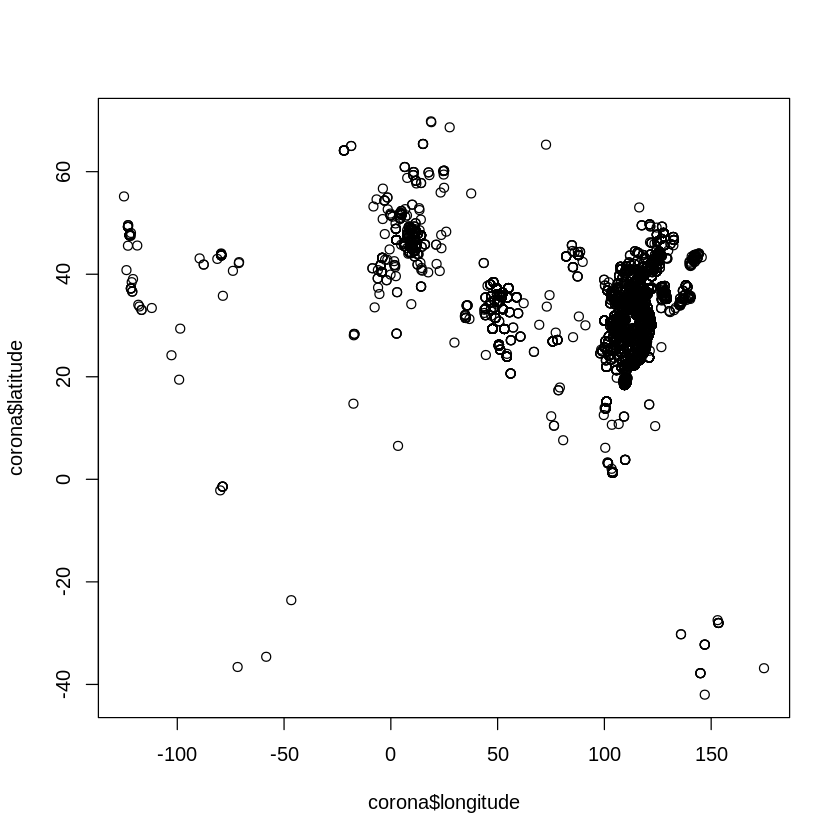

In [ ]:
plot(corona$longitude, corona$latitude)

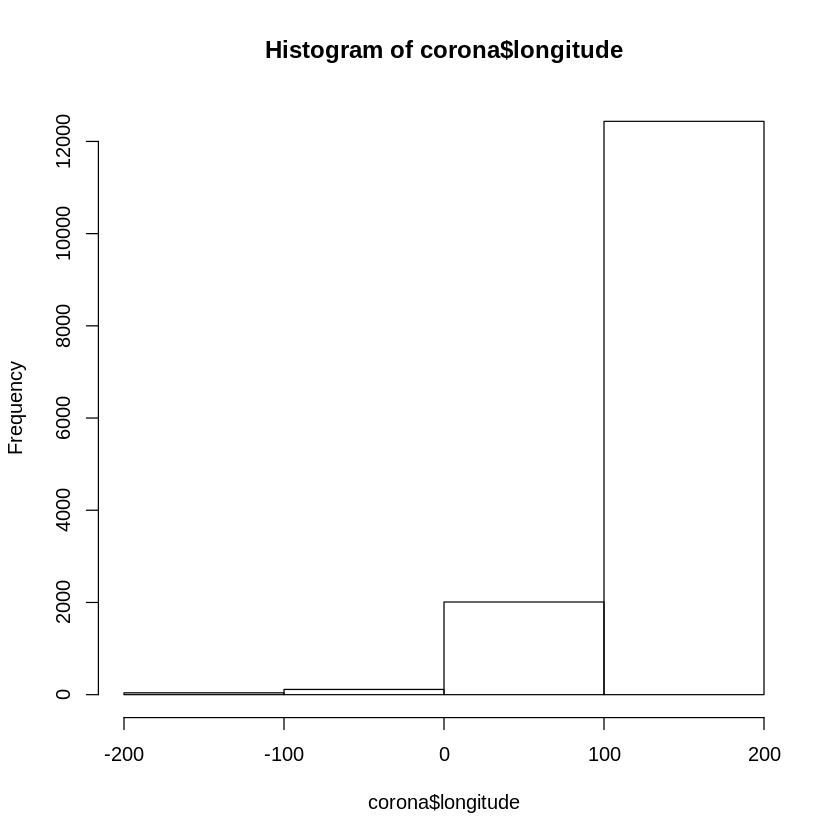

In [ ]:
hist(corona$longitude, 3)

In [ ]:
left_join(df1, df2, by = "key")
right_join(df1, df2, by = c("key_1" = "key_2"))
full_join(df1, df2, by = c("key1", "key2" = "key3"))
inner_join(df1, df2, by = c("key_1" = "key_2"))
anti_join(df1, df2, by = c("key_1" = "key_2"))
semi_join(df1, df2, by = c("key_1" = "key_2"))

In [ ]:
left_join(corona, corona)

Joining, by = c("ID", "age", "sex", "city", "province", "country", "wuhan(0)_not_wuhan(1)", "latitude", "longitude", "geo_resolution", "date_onset_symptoms", "date_admission_hospital", "date_confirmation", "symptoms", "lives_in_Wuhan", "travel_history_dates", "travel_history_location", "reported_market_exposure", "additional_information", "chronic_disease_binary", "chronic_disease", "source", "sequence_available", "outcome", "date_death_or_discharge", "notes_for_discussion", "location", "admin3", "admin2", "admin1", "country_new", "admin_id", "data_moderator_initials")



ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,⋯,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.64696,117.7166,admin3,⋯,NA,NA,NA,NA,Chaohu City,Hefei City,Anhui,China,340181,NA
2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.77863,117.3319,admin3,⋯,NA,NA,NA,NA,Baohe District,Hefei City,Anhui,China,340111,NA
3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.82831,117.2248,point,⋯,NA,NA,NA,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NA
4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.82831,117.2248,point,⋯,NA,NA,NA,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NA
5,50,female,"Feidong County, Hefei City",Anhui,China,1,32.00123,117.5681,admin3,⋯,NA,NA,NA,NA,Feidong County,Hefei City,Anhui,China,340122,NA
6,N/A,N/A,Lu'an City,Anhui,China,1,31.75941,116.3151,admin2,⋯,NA,NA,NA,NA,NA,Lu'an City,Anhui,China,341500,NA
7,42,female,Fuyang City,Anhui,China,1,32.91880,115.7036,admin2,⋯,NA,NA,NA,NA,NA,Fuyang City,Anhui,China,341200,NA
8,NA,female,Huaibei City,Anhui,China,1,33.72722,116.7424,admin2,⋯,NA,NA,NA,NA,NA,Huaibei City,Anhui,China,340600,NA
9,59,female,Huainan City,Anhui,China,1,32.75738,116.7340,admin2,⋯,NA,NA,NA,NA,NA,Huainan City,Anhui,China,340400,NA


In [ ]:
fit <- lm(latitude~sex, data = corona)

In [ ]:
fit


Call:
lm(formula = latitude ~ sex, data = corona)

Coefficients:
(Intercept)    sexFemale      sexmale      sexMale       sexmle       sexN/A  
    30.6920       1.1425       0.3937      -8.3113      16.9177       1.1531  
